# Disciplina: Análise de Dados

## Trabalho 1
**NOME:** Matheus Martins Scheffer
***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('nba.csv')

In [4]:
df.head(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN


Q1. Como você avalia os dados deste dataset. Existem valores NULOS? Se sim, quantos e quais. Demonstre. 

R.: Existem valores nulos nas colunas College (84) e Salary (11)

In [5]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
df.Salary.isnull().value_counts()

False    446
True      11
Name: Salary, dtype: int64

Q2. Com relação a posição dos atletas, apresente a distribuição de frequência deste parâmetro (absoluta e percentual). Apresente também o histograma com a linha de distribuição de frequência para estes dados. Apresente uma análise sobre o resultado do diagrama gerado.


R:

Podemos perceber que há um maior volume de jogadores na posição de Ala Armador(SG), e uma menor concentração de jogadores nas posições de Pivô (Centro).

In [7]:
absoluta = df.Position.value_counts()
percentual = df.Position.value_counts(normalize=True) * 100
positions = list(df.Position.value_counts().index)
df_position = pd.DataFrame({
    "Absoluta" : absoluta,
    "Percentual": percentual
})
df_position


,Absoluta,Percentual
SG,102,22.319475
PF,100,21.881838
PG,92,20.131291
SF,85,18.599562
C,78,17.067834


<AxesSubplot:ylabel='Absoluta'>

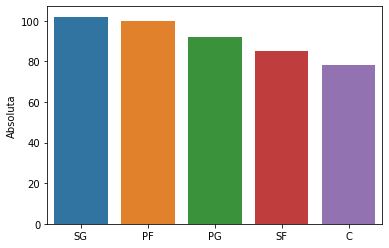

In [8]:
sns.barplot(x=df_position.index,y=df_position.Absoluta)

<AxesSubplot:ylabel='Percentual'>

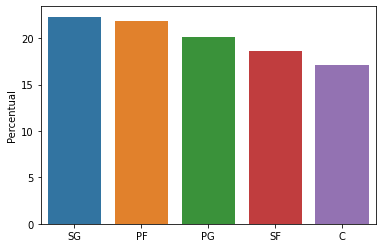

In [9]:
sns.barplot(x=df_position.index,y=df_position.Percentual)

Q3. Faça uma segmentação da base de dados com base na idade dos atletas. Para esta atividade deve ser realizada uma classificação fixa onde: o menor valor é 18 o maior valor é 45 e a amplitude das classes é 3. Apresentar a informação de idade utilizando os gráficos de boxplot e histograma (com linha de distribuição de frequência). Realizar uma breve análise dos resultados obtidos. 


R:

No gráfico de histograma, podemos perceber que os dados se concentram próximos à faixa dos 25 Anos, com uma diminuição drástica da concentração de dados perto dos quarenta e a inexistencia de dados na faixa dos 15 anos.
No gráfico de Boxplot, podemos confirmar a afirmação acima, uma vez que a linha central do gráfico que indica a médica se encontra muito próximo aos 25 anos. Além disso, percebemos que o **limite mínimo** fica logo abaixo dos 20 anos, e o máximo, pouco abaixo dos 40. Acima dos 40 anos também temos a incidência de um outlier.

In [10]:
#Dados exigidos

Vm = 18
VM = 45
AT = 27 #(com base nos valroes exigidos)
h = 3
k =  int(AT / h) #= 9

In [11]:
classes = [i for i in range(Vm, VM + k, k)]
print(f'Classes: {classes}')

rotulos = [''+ str(i) + ' |- ' + str(i + k) + '' for i in range(Vm ,VM ,k)]
print(f'Rotulos: {rotulos}')

Classes: [18, 27, 36, 45]
Rotulos: ['18 |- 27', '27 |- 36', '36 |- 45']


In [12]:
frequencia = pd.value_counts(pd.cut(x=df.Age, 
       bins=classes,
       labels=rotulos, 
       include_lowest=True))

frequencia

18 |- 27    276
27 |- 36    168
36 |- 45     13
Name: Age, dtype: int64

In [13]:
percentual = pd.value_counts(
    pd.cut(x=df.Age, 
       bins=classes,
       labels=rotulos, 
       include_lowest=True)
    , normalize=True
) * 100

percentual

18 |- 27    60.393873
27 |- 36    36.761488
36 |- 45     2.844639
Name: Age, dtype: float64

In [14]:
df_Age = pd.DataFrame({'Frequência':frequencia, 'Porcentagem (%)':percentual.round(4)})
df_Age.sort_index()

,Frequência,Porcentagem (%)
18 |- 27,276,60.3939
27 |- 36,168,36.7615
36 |- 45,13,2.8446


In [15]:
df_filtro = df[(df.Age >=18) & (df.Age <= 45)]

c:\Users\matheus.scheffer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

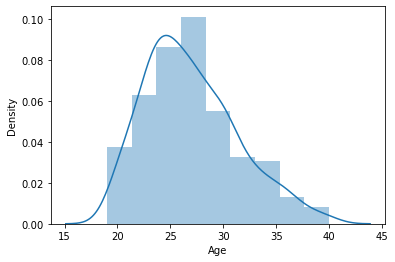

In [16]:
sns.distplot(df_filtro.Age,bins=k)

c:\Users\matheus.scheffer\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

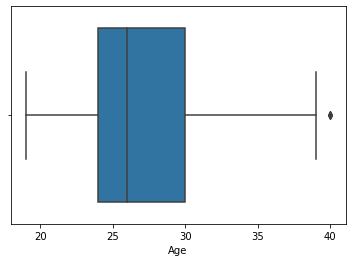

In [17]:
sns.boxplot(df_filtro.Age)

Q4. Apresentar a média do salário mensal dos atletas agrupados por equipe e posição. Após apresentar um gráfico de histograma com os valores médios dos salários.

In [18]:
df.groupby(['Team','Position']).agg({'Salary':'mean'})

Salary
Team               Position              
Atlanta Hawks      C         7.585417e+06
                   PF        5.988067e+06
                   PG        4.881700e+06
                   SF        3.000000e+06
                   SG        2.607758e+06
...                                   ...
Washington Wizards C         8.163476e+06
                   PF        5.650000e+06
                   PG        9.011208e+06
                   SF        2.789700e+06
                   SG        2.839248e+06

[149 rows x 1 columns]

Q5. Faça uma análise e prepare uma tabela que apresente a frequência dos atletas relacionando as informações de Altura, Peso e Posição. Após construa um gráfico boxplot com as informações de peso e altura. Com esta s duas informações apresente uma análise relacionada a estes dois atributos.
 
DICA: utilizar a função de agregação Observação ‘ count ’ . 

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
